# Punto 2
## Librerias

In [3]:
! pip install --user numpy pandas plotly scipy matplotlib

In [4]:
import numpy as np
import os
import pandas as pd
#import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

## Dataframe


In [5]:
df = pd.read_csv("data/CARS.csv")

In [9]:
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


## 2.1.1.


### Para la variable "Make"


In [58]:
df_marca_valores = df.groupby("Make")["Make"].agg(len)
df_marca_nombres = list(df["Make"].value_counts().index)

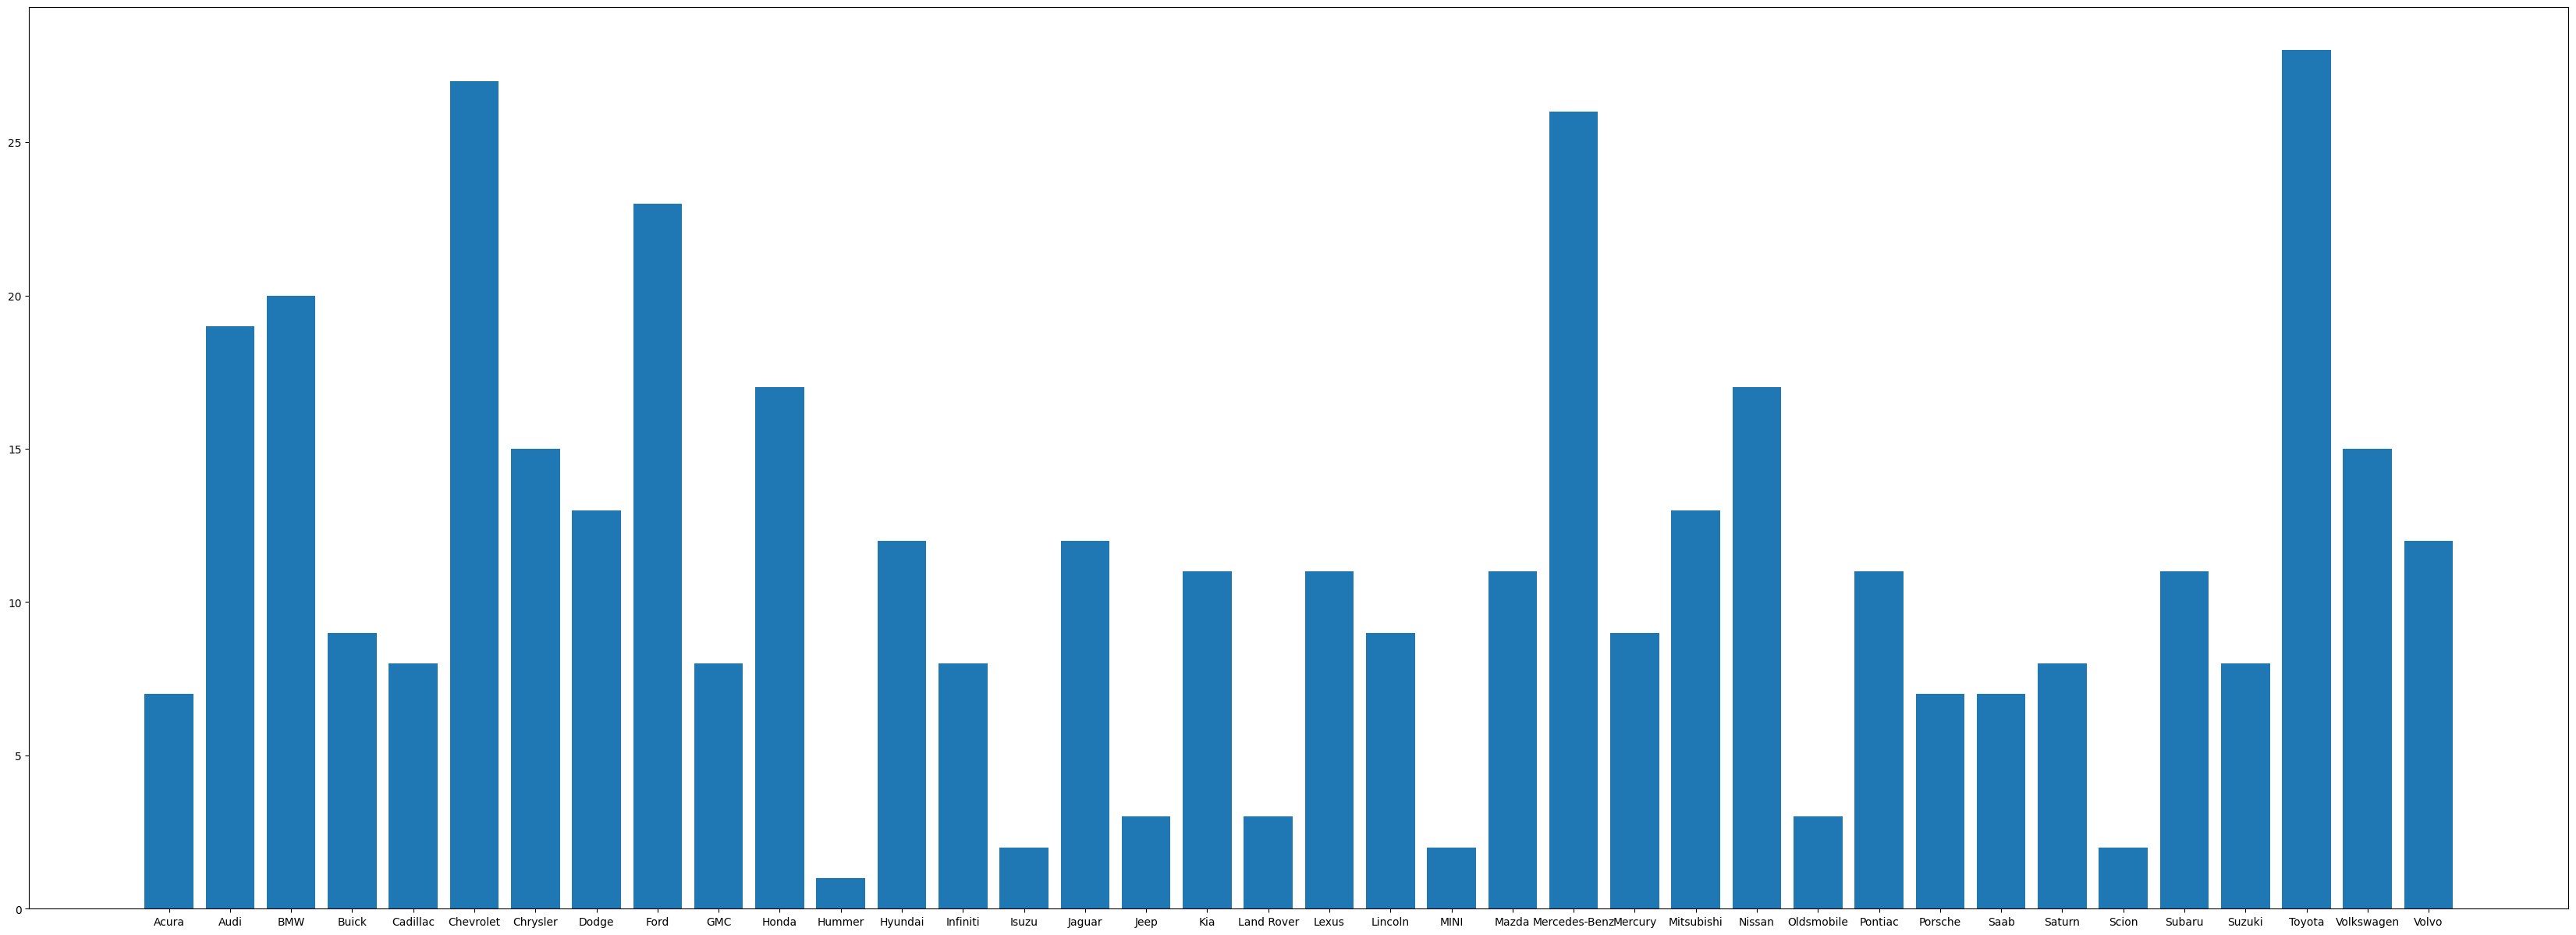

In [59]:
fig, ax1 = plt.subplots(figsize = (42,15))
graf = ax1.bar(sorted(df_marca_nombres),df_marca_valores)
plt.show()


**Conclusiones**: El auto chevrolet,ford, Mercedes_Benz y toyota son los autos que mas se encuentran dentro de esta compra/venta de autos.

### Para la variable "Model"


**Observaciones**: Al haber tantos modelos de autos y tan poca cantidad de cada uno (siendo 2 autos por modelo la cifra mas alta), podriamos analizar por ejemplo los modelos de autos de la marca que tiene mas modelos.


In [92]:
df[["Make","Model"]]\
    .groupby(["Make"]).agg({"Model":"count"})\
    .sort_values(by="Model",ascending=False).head(10)

,Model
Make,
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Volkswagen,15


Vemos que Toyota es la marca de autos con mas modelos


In [125]:
df[["Model"]][df.Make == "Toyota"]

,Model
373,Prius 4dr (gas/electric)
374,Sequoia SR5
375,4Runner SR5 V6
376,Highlander V6
377,Land Cruiser
378,RAV4
379,Corolla CE 4dr
380,Corolla S 4dr
381,Corolla LE 4dr
382,Echo 2dr manual


### Para la variable "Type"


In [126]:
df_tipo_valores = df.groupby("Type")["Type"].agg(len)
df_tipo_nombres = list(df["Type"].value_counts().index)

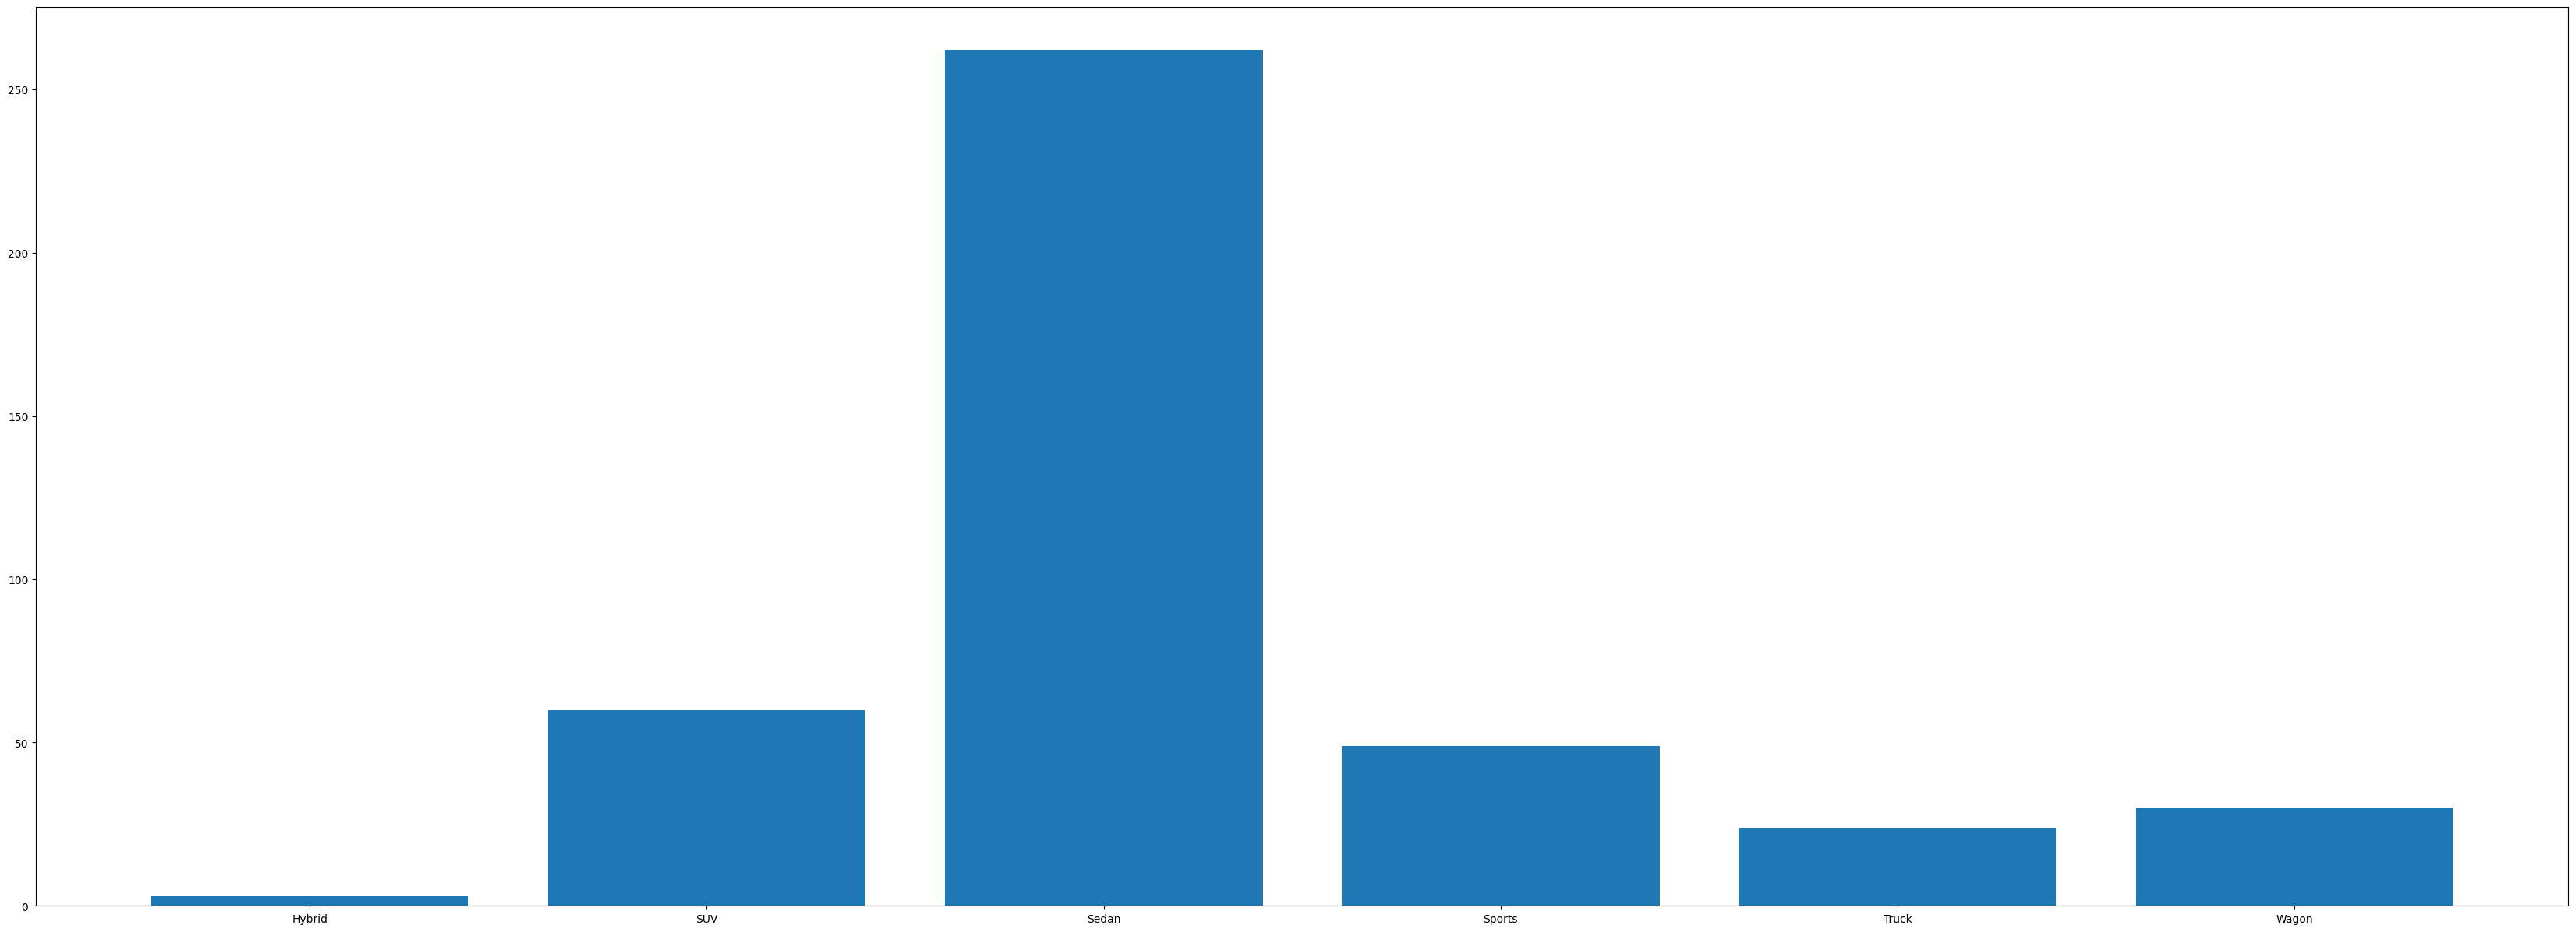

In [127]:
fig, ax3 = plt.subplots(figsize = (42,15))
graf = ax3.bar(sorted(df_tipo_nombres),df_tipo_valores)
plt.show()

***Conclusiones***: Podemos deducir de la grafica que hay muchos mas autos sedan que otros tipos de autos con diferencia, esto puede deberse a que este modelo de auto es el más comunes que hay en el mundo.

### Para la variable "origin"

In [133]:
df_origen_valores = df.groupby("Origin")["Origin"].agg(len)
df_origen_nombres = list(df["Origin"].value_counts().index)

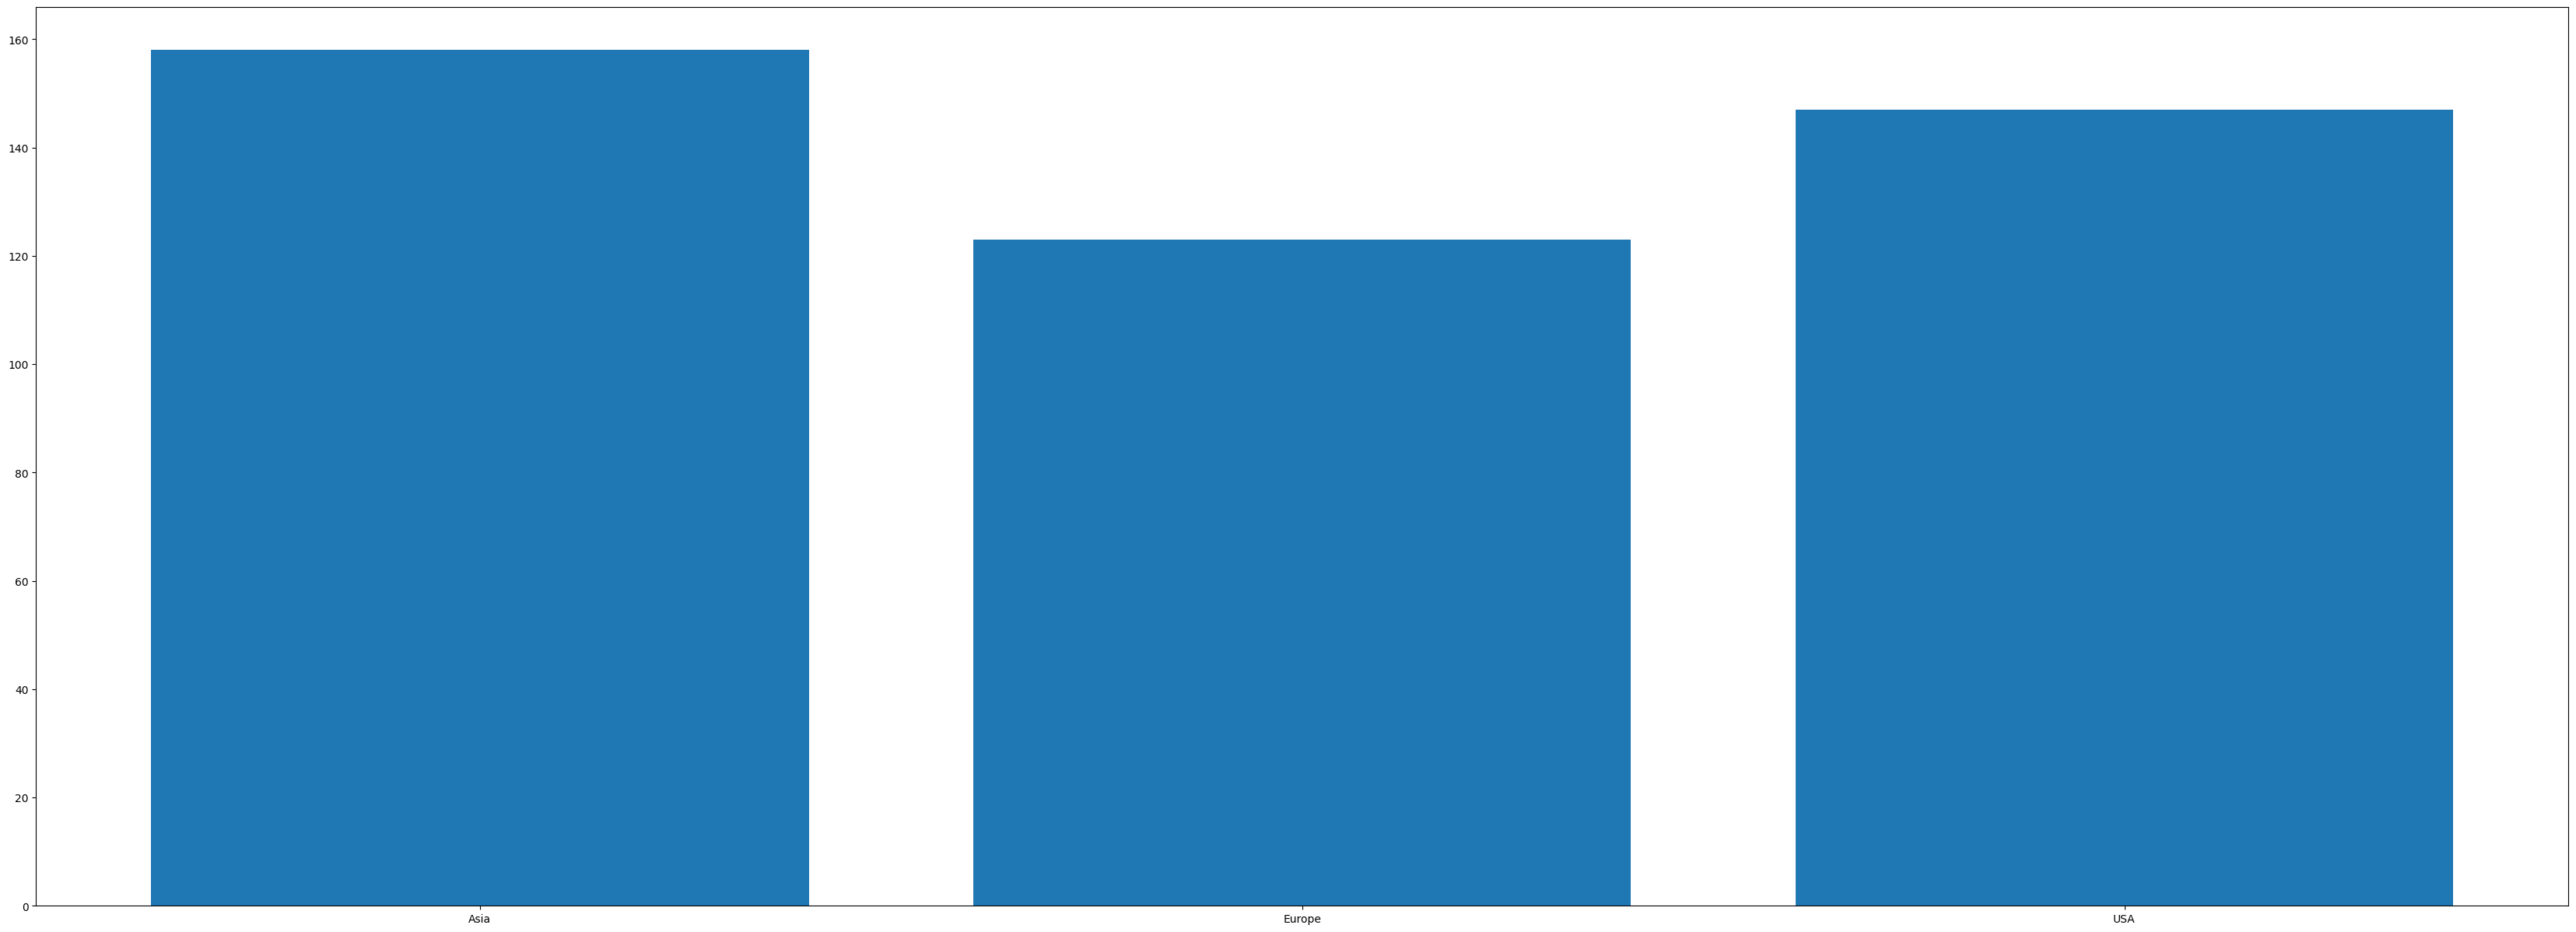

In [134]:
fig, ax4 = plt.subplots(figsize = (42,15))
graf = ax4.bar(sorted(df_origen_nombres),df_origen_valores)
plt.show()

***Concluciones***: podemos entender del grafico que dentro de esta compra/venta de autos no hay mucha diferencia en cuanto al origen de los autos que ofrecen, siendo Asia el origen de auto que mas tienen siguiendole USA y por ultimo Europa.


### Para la variable "Drivetrain"


In [136]:
df_tras_valores = df.groupby("DriveTrain")["DriveTrain"].agg(len)
df_tras_nombres = list(df["DriveTrain"].value_counts().index)

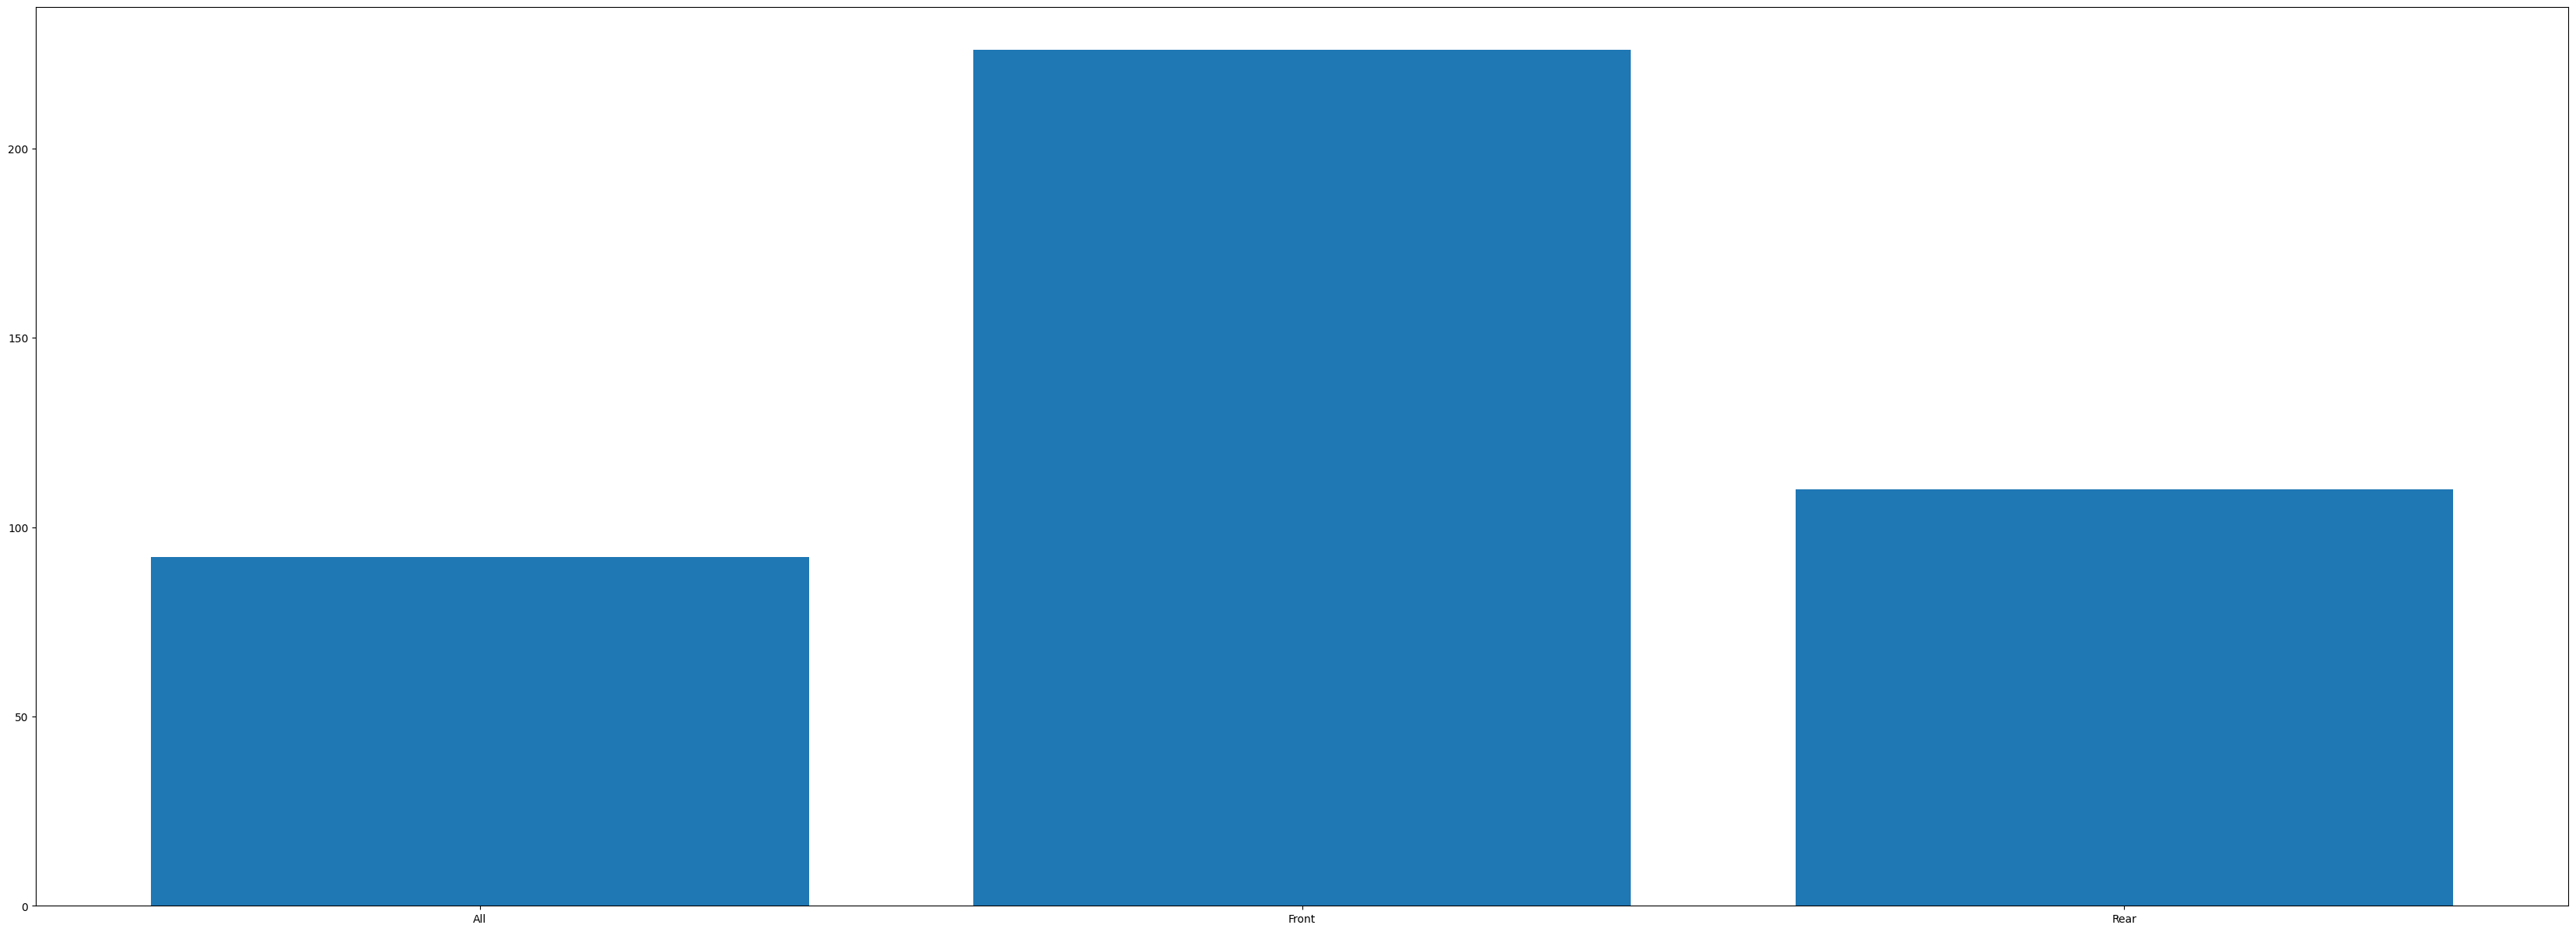

In [138]:
fig, ax5 = plt.subplots(figsize = (42,15))
graf = ax5.bar(sorted(df_tras_nombres),df_tras_valores)
plt.show()

***Conclución***: Podemos concluir que la mayoria de coches unicamente cuentran con transmision frontal

# 2.1.2.

### Para la variable "MSRP"


In [145]:
df["MSRP"] = df["MSRP"].replace('[\$,]', '', regex=True).astype(float)

In [146]:
fig_2 = px.histogram(df[["MSRP"]], x="MSRP", nbins=50)
fig_2.show()

### Para la variable "Invoice"

In [147]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [148]:
fig = px.histogram(df[["Invoice"]], x="Invoice", nbins=50)
fig.show()

### Para la variable "EngineSize"

In [149]:
fig = px.histogram(df[["EngineSize"]], x="EngineSize", nbins=50)
fig.show()

### Para la variable "Cylinders"

In [150]:
fig = px.histogram(df[["Cylinders"]], x="Cylinders", nbins=50)
fig.show()

### Para la variable "Horsepower"

In [151]:
fig = px.histogram(df[["Horsepower"]], x="Horsepower", nbins=50)
fig.show()

### Para la variable "MPG_City"

In [153]:
fig = px.histogram(df[["MPG_City"]], x="MPG_City", nbins=50)
fig.show()

### Para la variable "MPG_Highway"

In [154]:
fig = px.histogram(df[["MPG_Highway"]], x="MPG_Highway", nbins=50)
fig.show()

### Para la variable "Weight"

In [155]:
fig = px.histogram(df[["Weight"]], x="Weight", nbins=50)
fig.show()

### Para la variable "Wheelbase"

In [156]:
fig = px.histogram(df[["Wheelbase"]], x="Wheelbase", nbins=50)
fig.show()

### Para la variable "Length"

In [157]:
fig = px.histogram(df[["Length"]], x="Length", nbins=50)
fig.show()

### Sacamos outliers

# 2.2.1.


In [161]:
fig = px.box(df, x="Make", y="MPG_City")
fig.show()

***Observaciones***: Observando el grafico podemos ver algo muy interesante y es que no hay en su mayoria datos anormales, tambien que honda tiene algunos autos que estan muy alejados a la mediana de sus datos, los cuales generan un mayor ahorro de combustible que las demas marcas, tambien que tanto toyota y honda tiene un dato atipico de los demas en los que tienen un modelo de coche que genera un gran ahorro de combustible con diferencia.

In [162]:
fig = px.box(df, x="Model", y="MPG_City")
fig.show()

***Nota: Esta variable no se puede usar dentro del modelo ya que no se tienen suficientes observaciones sobre el dato***


In [163]:
fig = px.box(df, x="Type", y="MPG_City")
fig.show()

***Observaciones***: Podemos ver una variable que es atipica a los demas datos y es la de los coches hibridos, esto significa que dichos coches generan en gran medida y con diferencia mayor ahorro de combustible.

In [164]:
fig = px.box(df, x="Origin", y="MPG_City")
fig.show()

***Observaciones***: vemos que los datos estan muy centrados a la mediana y casi no tenemos datos atipicos o almenos no es mucha la diferencia entre ellos.

In [165]:
fig = px.box(df, x="DriveTrain", y="MPG_City")
fig.show()

***Observaciones***: Podemos ver que la gran mayoria de datos esta centrada a la mediana y a un menor ahorro de combustible, mientras que hay algunos datos dispersos de trenes de impulso que realmente generan ahorro.


# 2.2.2.

In [158]:
fig = px.scatter_matrix(df[["Invoice","MPG_City"]])
fig.show()

***Observaciones***: Podemos ver una correlacion negativa, lo que significa que las 2 variables son inversamente proporcionales, es decir, un mayor ahorro de combustible suele deberse a un menor costo del auto, esto puede deberse a que los autos mas antiguos que suelen ser mas economicos no tienen tanto gasto de combustible


In [166]:
fig = px.scatter_matrix(df[["EngineSize","MPG_City"]])
fig.show()

***Observaciones***:Podemos ver una correlacion negativa, lo que significa que las 2 variables son inversamente proporcionales, a mayor tamaño de la maquina menor es el ahorro de combustible.

In [167]:
fig = px.scatter_matrix(df[["Cylinders","MPG_City"]])
fig.show()

***Observaciones***: podemos observar una correlacion negativa, es decir que a mayor cilindraje, menor es el ahorro de combustible, esto puede significar que el auto a tomar mayor velocidad y tamaño gasta mas combustible.

In [168]:
fig = px.scatter_matrix(df[["Horsepower","MPG_City"]])
fig.show()

***Observaciones***: podemos ver una correlacion negativa, es decir, que a mayor caballos de fuerza, menor es el ahorro de combustible

In [169]:
fig = px.scatter_matrix(df[["MPG_Highway","MPG_City"]])
fig.show()

***Observaciones***: podemos ver una alta correlacion positiva, lo que significa que a mayor ahorro de combustible por la ciudad, hay mayor ahorro de combustible por la carretera, esta correlacion no tiene mucho sentido para hacer un analisis ya que son variables que no tienen relacion.

In [170]:
fig = px.scatter_matrix(df[["Weight","MPG_City"]])
fig.show()

***Observaciones***: Podemos ver que las variables tienen una correlacion negativa, ya que a mayor peso del auto, menor sera el ahorro de combustible por la ciudad

In [171]:
fig = px.scatter_matrix(df[["Wheelbase","MPG_City"]])
fig.show()

***Observaciones***: podemos ver una correlacion negativa muy debil ya que estas variables no tiene mucha relacion y no se podria predecir realmente un ahorro de combustible dependiendo de la distancia entre ejes

In [172]:
fig = px.scatter_matrix(df[["Length","MPG_City"]])
fig.show()

***Observaciones***: Podemos ver que las variables tienen una correlacion negativa, es decir, que a mayor largor del coche, menor sera su ahorro de combustible, esto tiene sentido ya que generalmente un coche largo significa que es un coche grande y pesado

# 2.3.1

Concidero que las variables mas importante que podria explicar la variabilidad del combustible gastado de un automobil cuando esta recorriendo en la ciudad es: el peso, los caballos de fuerza y el cilindraje. a continuacion haremos un analisis de la matriz de correlacion con dichas variables para saber si hemos tenido razon o no.

In [173]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_13484\2144758936.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Analisis y Conclusiones:

***Podemos observar que la mayoria de variables tienen una correlacion lineal negativa con respecto a el ahorro de conbustible por la ciudad, pero entre estas las que tienen una mayor fuerza son: el peso con un coeficiente de -0.738, siendo esta la que mejor explica dicha correlacion, lo que significa que a mayor peso del auto, menor sera el ahorro de combustible, tambien el tamaño de la maquina tiene mucho que ver con el consumo de combustible, es decir, que a mayor tamaño de la maquina, menor sera el ahorro del combustible, tambien podemos destacar el cilindraje y los caballos de poder.***